In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import plot_precision_recall_curve as ppc
from sklearn.metrics import plot_roc_curve as prc

from sklearn.model_selection import cross_validate as cv

In [17]:
# Some arbitrary data transformation for easier handling

train = pd.read_csv('data/train.csv') # train data
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train = pd.get_dummies(train)
train = train.fillna(train.median())

test = pd.read_csv('data/test.csv') # test data
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.get_dummies(test)
test = test.fillna(test.median())

res = pd.read_csv('data/gender_submission.csv') # ground truth
res = res['Survived']

# Split train to features and targets

Y_train = np.array(train.iloc[:, [0]])
X_train = train.drop(train.iloc[:, [0]].columns, axis=1)

In [45]:
# Training with some classifier

#clf = DTC(random_state=42)
#clf = DTC()
clf = KNC()
clf.fit(X_train, Y_train.ravel())
Y_test = clf.predict(test)
Y_test_proba = clf.predict_proba(test)[:,1]

In [46]:
acc(res,Y_test) # accuracy score

0.6913875598086124

In [47]:
auc(res,Y_test_proba) # AUC score

0.7086466165413534

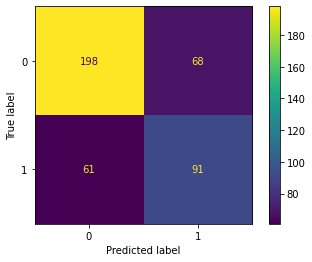

In [48]:
pcm(clf,test,res) # Plotting confusion matrix

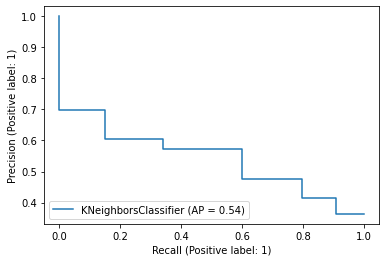

In [49]:
ppc(clf,test,res) # Plotting precision recall curve

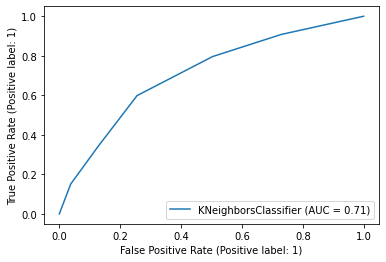

In [50]:
prc(clf,test,res) # Plotting ROC curve

In [51]:
# Cross-validation in Sklearn

cv_results = cv(clf, X_train, np.ravel(Y_train), cv=5)
print(cv_results['test_score'])

[0.68156425 0.6741573  0.71348315 0.73033708 0.7247191 ]
